<a href="https://colab.research.google.com/github/GENNYB7/WineDataLogisticRandomforestKNN/blob/main/WineDataLogisticRandomforestKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
wine_df = pd.read_csv('/content/drive/MyDrive/Coding_Dojo/Machine Learning/wine.data')

In [ ]:
wine_df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']

In [ ]:
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
wine_df['Class label'].value_counts()

2    71
1    58
3    48
Name: Class label, dtype: int64

In [ ]:
wine_df.isnull().any()

Class label                     False
Alcohol                         False
Malic acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
dtype: bool

In [ ]:
wine_df.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
wine_df.shape

(177, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


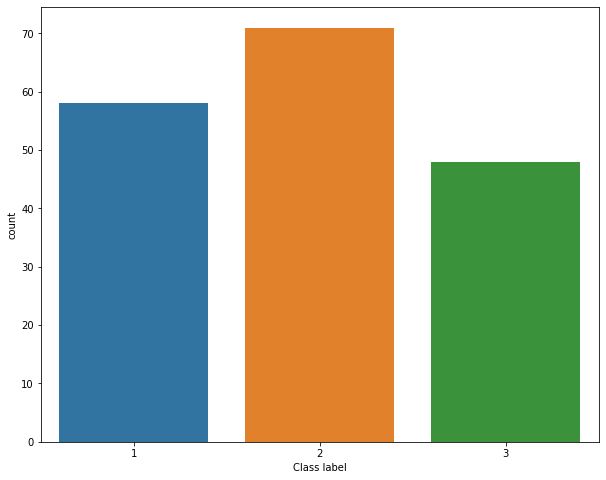

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.countplot(wine_df['Class label']);

ONE VS ALL

split data into train and test sets


In [ ]:
X=wine_df.drop(columns='Class label')
Y=wine_df['Class label']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(123, 13) (54, 13) (123,) (54,)


In [ ]:
#from lesson
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, Y_train)
print('Training accuracy:', log_reg.score(X_train, Y_train))
print('Test accuracy:', log_reg.score(X_test, Y_test))

Training accuracy: 0.991869918699187
Test accuracy: 0.9814814814814815


In [ ]:
log_reg.intercept_

array([-1.4292956 , -1.00188213, -2.13022091])

In [ ]:
log_reg.coef_

array([[ 1.03444477,  0.02038877,  0.90617709, -1.25288131,  0.        ,
         0.        ,  0.82381312,  0.        ,  0.        ,  0.        ,
         0.        ,  0.94379566,  2.47142778],
       [-1.56760602, -0.91696607, -0.97777048,  0.44914059,  0.        ,
         0.        ,  0.19667491,  0.        ,  0.        , -1.66635898,
         0.93813962,  0.        , -2.19215191],
       [ 0.        ,  0.54698818,  0.0579344 ,  0.        ,  0.        ,
         0.        , -2.43756494,  0.        ,  0.        ,  1.92885811,
        -0.9997127 ,  0.        ,  0.        ]])

In [ ]:
log_reg.predict_proba(X_test[0:1])

array([[0.98721678, 0.00449054, 0.00829268]])

Here our model performed even better.

In [ ]:
log_reg = LogisticRegression(penalty='l2',
                        C=1.0,
                        solver='liblinear',
                        multi_class='auto',)
log_reg.fit(X_train, Y_train)
print('Training accuracy:', log_reg.score(X_train, Y_train))
print('Test accuracy:', log_reg.score(X_test, Y_test))

Training accuracy: 0.991869918699187
Test accuracy: 1.0


In [ ]:
#Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=3)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [ ]:
print('Training accuracy:', rfc.score(X_train, Y_train))
print('Test accuracy:', rfc.score(X_test, Y_test))

Training accuracy: 1.0
Test accuracy: 1.0


KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
predictions = knn.predict(X)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3])

In [ ]:
knn.score(X,Y)

1.0